# Quantum Teleportation Circuit

In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

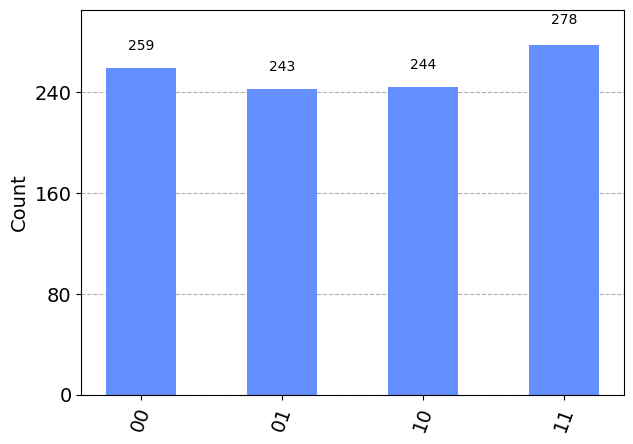

In [2]:
# Initialize the Quantum Circuit
circuit = QuantumCircuit(3, 2)

# Step 1: Prepare the initial state of the qubit to be teleported (qubit 0)
# Using |1> state for this example
circuit.x(0)  # Applying X gate to change |0> to |1>

# Step 2: Create a Bell pair between qubit 1 and qubit 2
circuit.h(1)  # Applying Hadamard gate to qubit 1
circuit.cx(1, 2)  # CNOT gate with qubit 1 as control and qubit 2 as target

# Step 3: Entangle qubit 0 with qubit 1 and perform measurements
circuit.cx(0, 1)
circuit.h(0)
circuit.measure([0, 1], [0, 1])  # Measure qubits 0 and 1

# Step 4: Apply conditional operations based on classical measurements
# This is achieved by using classical bits to control quantum gates
circuit.cx(1, 2)  # Apply CNOT if qubit 1 is measured as 1
circuit.cz(0, 2)  # Apply CZ if qubit 0 is measured as 1

# Execute the circuit on a simulator
simulator = Aer.get_backend("qasm_simulator")
result = execute(circuit, simulator, shots=1024).result()
counts = result.get_counts(circuit)

# Display the results
plot_histogram(counts)